# Report for final project

* Team 23
* Team members: haixul2@illinois.edu, kex7@illinois.edu, sw67@illinois.edu
* Paper title: An attention based deep learning model of clinical events in the intensive care unit

## Introduction

The [paper](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0211057&type=printable) tries to make predictions for daily sepsis, myocardial infarction, and ancomycin antibiotic administration respectively over two week for patients in ICU. The predication model uses a long short-term memory (LSTM) architecture with an attention mechanism.

* Team project github page [https://github.com/KeXu1739/UIUCDLH_project](https://github.com/KeXu1739/UIUCDLH_project).

## Scope of reproducibility

The research done in the paper should be reproduced as the author used open-source dataset (MIMIC-III) and the source code can be found on [github](https://github.com/deepak-kaji/mimic-lstm).

## Methodology

### Environment

* Python version: 3.8.15
* Dependencies/packages needed：tensorflow 2.10.0, Keras 2.10.0, numpy 1.24.4.
* A complete list of installed python pakages can be found from `Python_environment.yaml` file in the repo.

### Data
* Data download instruction:

1. Visit [physionet.org](https://physionet.org/content/mimiciii/1.4/), and create an account.
2. Finish the CITI data training and sign agreement.
3. Download the data and extract the zipped data.

* Data description with visualization。

MIMIC-III is a large, freely-available database comprising deidentified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. More information about the data can be found in [paper](https://www.nature.com/articles/sdata201635) by Johnson, A et al.

Figure 1: Overview of the MIMIC-III critical care database
![Overview of the MIMIC-III critical care database](41597_2016_Article_BFsdata201635_Fig1_HTML.webp)

Figure 2: Sample data for a single patient stay in a medical intensive care unit.
![Sample data for a single patient stay in a medical intensive care unit.](41597_2016_Article_BFsdata201635_Fig2_HTML.webp)

* Data pre-processing step:
    * Use script `process_mimic.py` for this task.
    * The script uses unzipped MIMIC-III csv files and does a few things. It selects relavent features only and format the data into day blocks.
    * The processed files are saved at: `\mimic_database\mapped_elements\*.csv`


In [30]:
# listing the files after pre-processing step
import os
try:
    files = os.listdir("mimic_database/mapped_elements")
    for f in files:
        print(f)
except:
    print("Cannot find the processed files.")

CHARTEVENTS_reduced.csv
CHARTEVENTS_reduced_24_hour_blocks.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds.csv
CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv


## Model

* Original paper: [Kaji, Deepak A., et al. "An attention based deep learning model of clinical events in the intensive care unit." PloS one 14.2 (2019): e0211057.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0211057)

* [Github link of the paper](https://github.com/deepak-kaji/mimic-lstm)

* Model description: a long short-term memory (LSTM) recurrent neural networks (RNNs) incorporating an attention mechanism

* Implementation code:
    * Original code can be found from [rnn_mimic.py](https://github.com/deepak-kaji/mimic-lstm/blob/master/rnn_mimic.py)
    * We made some adjustments of the code for reproducing purpose:
      1. Model without attention: `rnn_mimic_noAtten.py`
      2. Model for hyper-parameter test: `rnn_mimic_hyper_test.py`

## Training

* Hyperparams (3 chosen for testing)
    * Learning rate: 0.001
    * rho: 0.9
    * Epoch: 13
 
* Computational requirements
    *   Intel Xeon CPU E5-2630 v3 2.40GHz, 32GB memory
    *   ~5s per Epoch

* Training code: [rnn_mimic.py](https://github.com/deepak-kaji/mimic-lstm/blob/master/rnn_mimic.py)

* Evaluation:
    * ROC, AUC
    * Evaluation code: [attention_mimic_implementation-final.ipynb](https://github.com/deepak-kaji/mimic-lstm/blob/master/attention_mimic_implementation-final.ipynb)
  

## Results

### Result of reproducibility: model performance test

| Prediction Target | AUC from paper | AUC from reproduced result|
|-------------------|----------------|---------------------------|
|SEPSIS             |      0.952     |  0.980                    |
|MI                 |      0.834     |  0.867                    |
|VANCOMYCIN         |      0.904     |  0.949                    |

The model proposed by the original paper can achieve high AUC values for three targets: SEPSIS, MI and VANCOMYCIN. However, We are seeing higher ROC AUC score from reproduced result compared to the original paper. This could be a result of run-to-run variation, or a different seed value, or updated python library.

In [31]:
import gc
import numpy as np
import pandas as pd
import keras.backend as K
from rnn_mimic import return_loaded_model
from seaborn import heatmap
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis

# plot part.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
try:
    m_MI = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    m_SEPSIS = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14")
    m_VANCOMYCIN = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14")

    Y_TEST_MI = pickle.load(open('./pickled_objects/Y_TEST_MI.txt', 'rb'))
    Y_TEST_SEPSIS = pickle.load(open('./pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
    Y_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))
    
    X_TEST_MI = pickle.load(open('./pickled_objects/X_TEST_MI.txt', 'rb'))
    X_TEST_SEPSIS = pickle.load(open('./pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
    X_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))
    
    y_boolmat_test_MI = pickle.load(open('./pickled_objects/y_boolmat_test_MI.txt', 'rb'))
    y_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
    y_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))
    
    x_boolmat_test_MI = pickle.load(open('./pickled_objects/x_boolmat_test_MI.txt', 'rb'))
    x_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
    x_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))
    
    no_features_cols_MI = pickle.load(open('./pickled_objects/no_feature_cols_MI.txt', 'rb'))
    no_features_cols_SEPSIS = pickle.load(open('./pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
    no_features_cols_VANCOMYCIN = pickle.load(open('./pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))
    
    features_MI = pickle.load(open('./pickled_objects/features_MI.txt', 'rb'))
    features_SEPSIS = pickle.load(open('./pickled_objects/features_SEPSIS.txt', 'rb'))
    features_VANCOMYCIN = pickle.load(open('./pickled_objects/features_VANCOMYCIN.txt', 'rb'))

    X_TEST_MASK = np.copy(X_TEST_MI)
    X_TEST_MASK[x_boolmat_test_MI] = 0
    Y_PRED_mask_MI = m_MI.predict(X_TEST_MASK)
    del X_TEST_MASK

    X_TEST_MASK = np.copy(X_TEST_SEPSIS)
    X_TEST_MASK[x_boolmat_test_SEPSIS] = 0
    Y_PRED_mask_SEPSIS = m_SEPSIS.predict(X_TEST_MASK)
    del X_TEST_MASK

    X_TEST_MASK = np.copy(X_TEST_VANCOMYCIN)
    X_TEST_MASK[x_boolmat_test_VANCOMYCIN] = 0
    Y_PRED_mask_VANCOMYCIN = m_VANCOMYCIN.predict(X_TEST_MASK)
    del X_TEST_MASK
    print("ROC AUC results")
    print("MI: ", roc_auc_score(Y_TEST_MI[~y_boolmat_test_MI], Y_PRED_mask_MI[~y_boolmat_test_MI]))
    print("SEPSIS: ", roc_auc_score(Y_TEST_SEPSIS[~y_boolmat_test_SEPSIS], Y_PRED_mask_SEPSIS[~y_boolmat_test_SEPSIS]))
    print("VANCOMYCIN: ", roc_auc_score(Y_TEST_VANCOMYCIN[~y_boolmat_test_VANCOMYCIN], Y_PRED_mask_VANCOMYCIN[~y_boolmat_test_VANCOMYCIN]))

except:
    print("Cannot find the trained models or input data.")
    

342/342 [==============================] - 6s 12ms/step
ROC AUC results
MI:  0.8598530093696077
SEPSIS:  0.980362851448741
VANCOMYCIN:  0.9486864744414266


### Result of reproducibility: model trend test

The paper claims that the model can make prediction at a time point further in the future. This is tested by masking a section of the data used in the inference step. <strong> We can reproduce the result qualitatively. </strong>

The result makes sense that the more data you have, the better the prediction, especially if the missing data is close to the prediction event in time.

342/342 [==============================] - 4s 12ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


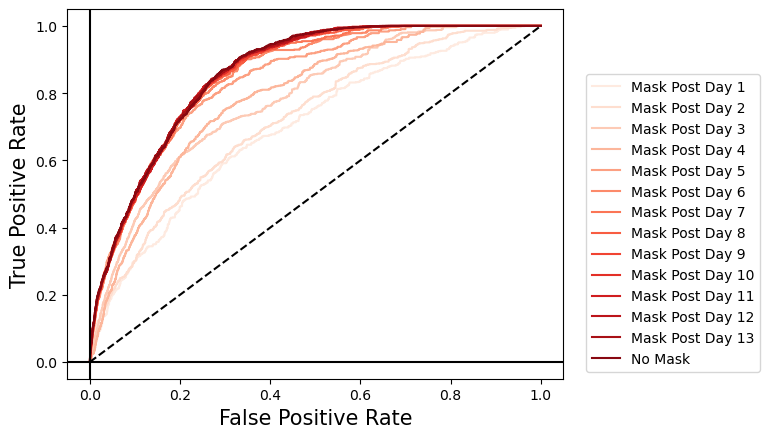

In [32]:
# reproducing the ROC data fromt the paper

##############
## FIGURE 1 ##
##############
try:
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14")
    my_cmap = ListedColormap(sns.color_palette("Reds", 150))
    color_list = sns.color_palette("Reds", 14)
    color_list_reduced = sns.color_palette("Reds", 7)
    
    Y_TEST = Y_TEST_MI
    X_TEST = X_TEST_MI
    y_boolmat_test = y_boolmat_test_MI
    x_boolmat_test = x_boolmat_test_MI
    features = features_MI
    
    X_TEST_MASK = np.copy(X_TEST)
    X_TEST_MASK[x_boolmat_test] = 0
    Y_PRED_mask_0 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 1
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_1 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 2
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_2 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 3
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_3 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 4
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_4 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 5
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_5 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 6
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_6 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 7
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_7 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 8
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_8 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 9
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_9 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 10
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_10 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 11
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_11 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 12
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_12 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    mask = 13
    X_TEST_MASK[x_boolmat_test] = 0
    X_TEST_MASK[:,mask:,:] = 0
    Y_PRED_mask_13 = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    (fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_0[~y_boolmat_test])
    (fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_1[~y_boolmat_test])
    (fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_2[~y_boolmat_test])
    (fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_3[~y_boolmat_test])
    (fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_4[~y_boolmat_test])
    (fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_5[~y_boolmat_test])
    (fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_6[~y_boolmat_test])
    (fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_7[~y_boolmat_test])
    (fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_8[~y_boolmat_test])
    (fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_9[~y_boolmat_test])
    (fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_10[~y_boolmat_test])
    (fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_11[~y_boolmat_test])
    (fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_12[~y_boolmat_test])
    (fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_13[~y_boolmat_test])
    
    fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
                (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
                (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
                (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]
    
    ##############
    ## FIGURE 1 ##
    ##############
    target = "MI"
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    
    counter = 1
    
    for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
        if counter != 14:
            plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Day {0}'.format(counter), color=color)
            counter = counter+1
        elif counter == 14:
            plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)
            
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
    plt.savefig('./figures/{0}_roc_curves_Fig_1.eps'.format(target), format='eps',
                 dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

except:
    print("Trained model cannot be loaded!")
    

Original result reported from the paper is shown below for comparison.

![MI ROC with respect to post-day mask](Orig_MI_ROC.JPG)

### Ablation test: impact of the attention layer

One of the key point is to add an attention layer into the RNN to achieve good result and high interpretability. However, the performance of with/without the Attention layer is missing from the original paper. Thus we compared two cases: with Attention layer (from paper) and without Attention layer.

| Prediction Target | AUC without Attention | AUC with Attention|
|-------------------|----------------|---------------------------|
|SEPSIS             |      0.989     |  0.980                    |
|MI                 |      0.929     |  0.867                    |
|VANCOMYCIN         |      0.964     |  0.949                    |


We found that the AUC value is higher without Attention layer is higher than with Attention layer. Thus we believe the main benefit of the attention layer is to <strong> improve interpretability at the cost of prediction accuracy </strong>. 

The result is counter-intuitive, as we would expect that attention layer will help to boost the prediction accuracy. We have thoroughly checked our implementation and made sure the result is correct.

Here is a quote from the paper: <em>"...the incorporation of variable-level attention could promote straightforward interpretability of such a model to clinicians."</em>


In [33]:
# calculate AUC for models without the Attention layer
try:
    m_MI = return_loaded_model(model_name="kaji_mach_final_no_mask_MI_pad14_NoATT")
    m_SEPSIS = return_loaded_model(model_name="kaji_mach_final_no_mask_SEPSIS_pad14_NoATT")
    m_VANCOMYCIN = return_loaded_model(model_name="kaji_mach_final_no_mask_VANCOMYCIN_pad14_NoATT")

    Y_TEST_MI = pickle.load(open('./pickled_objects/Y_TEST_MI.txt', 'rb'))
    Y_TEST_SEPSIS = pickle.load(open('./pickled_objects/Y_TEST_SEPSIS.txt', 'rb'))
    Y_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/Y_TEST_VANCOMYCIN.txt', 'rb'))
    
    X_TEST_MI = pickle.load(open('./pickled_objects/X_TEST_MI.txt', 'rb'))
    X_TEST_SEPSIS = pickle.load(open('./pickled_objects/X_TEST_SEPSIS.txt', 'rb'))
    X_TEST_VANCOMYCIN = pickle.load(open('./pickled_objects/X_TEST_VANCOMYCIN.txt', 'rb'))
    
    y_boolmat_test_MI = pickle.load(open('./pickled_objects/y_boolmat_test_MI.txt', 'rb'))
    y_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/y_boolmat_test_SEPSIS.txt', 'rb'))
    y_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/y_boolmat_test_VANCOMYCIN.txt', 'rb'))
    
    x_boolmat_test_MI = pickle.load(open('./pickled_objects/x_boolmat_test_MI.txt', 'rb'))
    x_boolmat_test_SEPSIS = pickle.load(open('./pickled_objects/x_boolmat_test_SEPSIS.txt', 'rb'))
    x_boolmat_test_VANCOMYCIN = pickle.load(open('./pickled_objects/x_boolmat_test_VANCOMYCIN.txt', 'rb'))
    
    no_features_cols_MI = pickle.load(open('./pickled_objects/no_feature_cols_MI.txt', 'rb'))
    no_features_cols_SEPSIS = pickle.load(open('./pickled_objects/no_feature_cols_SEPSIS.txt', 'rb'))
    no_features_cols_VANCOMYCIN = pickle.load(open('./pickled_objects/no_feature_cols_VANCOMYCIN.txt', 'rb'))
    
    features_MI = pickle.load(open('./pickled_objects/features_MI.txt', 'rb'))
    features_SEPSIS = pickle.load(open('./pickled_objects/features_SEPSIS.txt', 'rb'))
    features_VANCOMYCIN = pickle.load(open('./pickled_objects/features_VANCOMYCIN.txt', 'rb'))

    X_TEST_MASK = np.copy(X_TEST_MI)
    X_TEST_MASK[x_boolmat_test_MI] = 0
    Y_PRED_mask_MI = m_MI.predict(X_TEST_MASK)
    del X_TEST_MASK

    X_TEST_MASK = np.copy(X_TEST_SEPSIS)
    X_TEST_MASK[x_boolmat_test_SEPSIS] = 0
    Y_PRED_mask_SEPSIS = m_SEPSIS.predict(X_TEST_MASK)
    del X_TEST_MASK

    X_TEST_MASK = np.copy(X_TEST_VANCOMYCIN)
    X_TEST_MASK[x_boolmat_test_VANCOMYCIN] = 0
    Y_PRED_mask_VANCOMYCIN = m_VANCOMYCIN.predict(X_TEST_MASK)
    del X_TEST_MASK
    print("ROC AUC results without Attention layer")
    print("MI: ", roc_auc_score(Y_TEST_MI[~y_boolmat_test_MI], Y_PRED_mask_MI[~y_boolmat_test_MI]))
    print("SEPSIS: ", roc_auc_score(Y_TEST_SEPSIS[~y_boolmat_test_SEPSIS], Y_PRED_mask_SEPSIS[~y_boolmat_test_SEPSIS]))
    print("VANCOMYCIN: ", roc_auc_score(Y_TEST_VANCOMYCIN[~y_boolmat_test_VANCOMYCIN], Y_PRED_mask_VANCOMYCIN[~y_boolmat_test_VANCOMYCIN]))

except:
    print("Cannot find the trained models or input data.")
    

342/342 [==============================] - 5s 10ms/step
ROC AUC results without Attention layer
MI:  0.9292525899601305
SEPSIS:  0.988986796804281
VANCOMYCIN:  0.9647563797874983


342/342 [==============================] - 6s 11ms/step


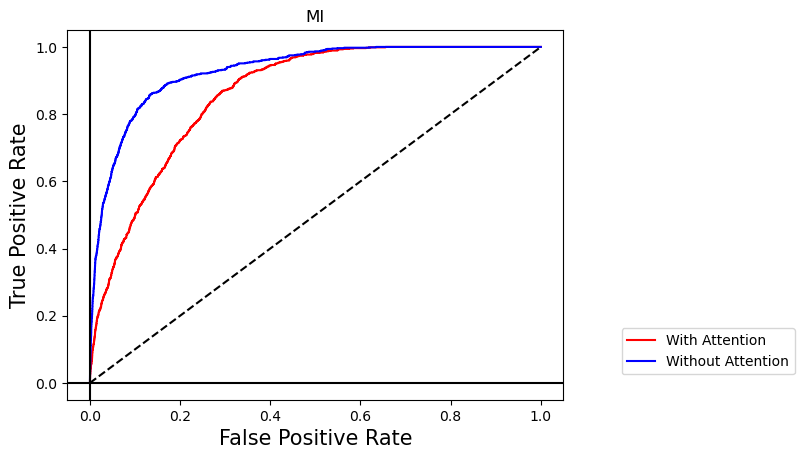

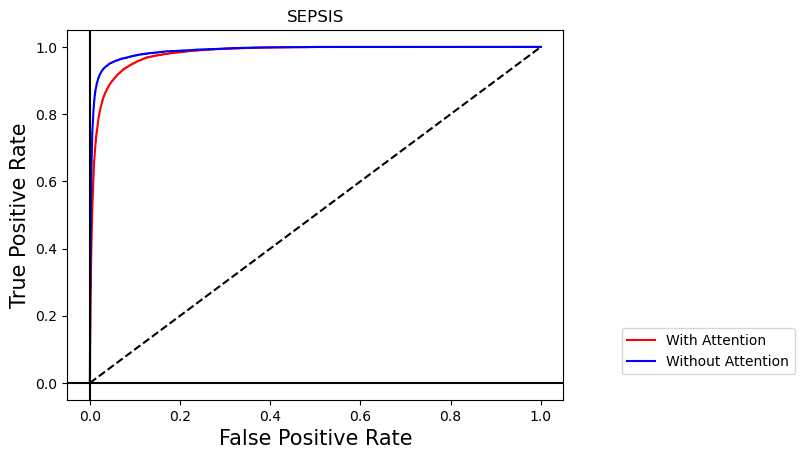

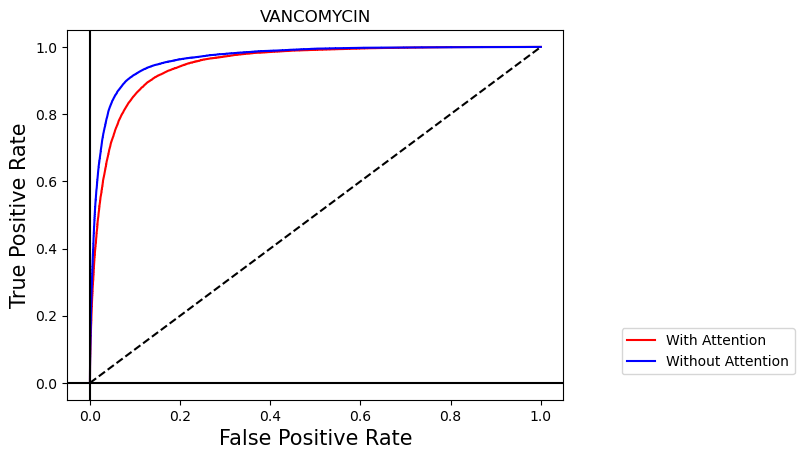

In [34]:
#ROC level comparison with/without attention layer
for target in ["MI", "SEPSIS", "VANCOMYCIN"]:
    m = return_loaded_model(model_name="kaji_mach_final_no_mask_" + target + "_pad14")
    m_NoATT = return_loaded_model(model_name="kaji_mach_final_no_mask_" + target + "_pad14_NoATT")
    if target == "MI":
        Y_TEST = Y_TEST_MI
        X_TEST = X_TEST_MI
        y_boolmat_test = y_boolmat_test_MI
        x_boolmat_test = x_boolmat_test_MI
        features = features_MI
    elif target == "VANCOMYCIN":
        Y_TEST = Y_TEST_VANCOMYCIN
        X_TEST = X_TEST_VANCOMYCIN
        y_boolmat_test = y_boolmat_test_VANCOMYCIN
        x_boolmat_test = x_boolmat_test_VANCOMYCIN
        features = features_VANCOMYCIN
    else:
        Y_TEST = Y_TEST_SEPSIS
        X_TEST = X_TEST_SEPSIS
        y_boolmat_test = y_boolmat_test_SEPSIS
        x_boolmat_test = x_boolmat_test_SEPSIS
        features = features_SEPSIS

    
    
    X_TEST_MASK = np.copy(X_TEST)
    X_TEST_MASK[x_boolmat_test] = 0
    Y_PRED_mask = m.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    X_TEST_MASK = np.copy(X_TEST)
    X_TEST_MASK[x_boolmat_test] = 0
    Y_PRED_mask_NoATT = m_NoATT.predict(X_TEST_MASK)
    del X_TEST_MASK
    
    
    (fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask[~y_boolmat_test])
    (fpr_100_NoATT, tpr_100_NoATT, thresholds_100_NoATT) = roc_curve(Y_TEST[~y_boolmat_test], Y_PRED_mask_NoATT[~y_boolmat_test])
    ATT_fpr_tprs = [(fpr_100, tpr_100), (fpr_100_NoATT, tpr_100_NoATT)]
    
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    
    for color, fpr_tpr_tuple, i in zip(['r', 'b'], ATT_fpr_tprs, ["With Attention", "Without Attention"]):
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label= i, color=color)
    
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.title(target)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
    plt.savefig('./figures/{0}_less_data_roc_curves_Supplemental_Figure_2_Atten.png'.format(target), format='png',
                 dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')


### Ablation test: Number of LSTM Units

#### Number of LSTM Units, the paper picked 256

Classification accuracy on validation data for different Number of LSTM Units in training. <strong>Best Number of LSTM Units is between 64 and 128.</strong>

| Prediction Target | 64         |          128|           256|           512|           1024|
|-------------------|----------------|---------------|---------------|---------------|---------------|
|SEPSIS             |      0.967     |  0.962        |   0.953       |   0.952       |   0.949       |
|MI                 |      0.801     |  0.825        |   0.814       |   0.811       |   0.814       |
|VANCOMYCIN         |      0.918     |  0.910        |   0.905       |   0.898       |   0.899       |


### Ablation test: hyper-parameter testing

#### Learning rate test, the paper picked 0.001

Classification accuracy on validation data for different learning rate. <strong>Best learning rate is between 0.001 and 0.01.</strong>


| Prediction Target | 0.0001         |          0.001|           0.01|
|-------------------|----------------|---------------|---------------|
|SEPSIS             |      0.902     |  0.919        |   0.932       |
|MI                 |      0.809     |  0.864        |   0.861       |
|VANCOMYCIN         |      0.846     |  0.856        |   0.853       |

Step to run the tests:
* On windows, open the cmd terminal, run command `test_learning_rate.bat`. Then the test with different learning rates and different targets will be automatically executed.

#### Rho test, the paper picked 0.90

Classification accuracy on validation data for different rho value. <strong>Best rho is at 0.9 for SEPSIS and VANCOMYCIN.</strong>


| Prediction Target | 0.88         |          0.90|           0.92|
|-------------------|----------------|---------------|---------------|
|SEPSIS             |      0.919     |  0.922        |   0.919       |
|MI                 |      0.851     |  0.872        |   0.884       |
|VANCOMYCIN         |      0.857     |  0.852        |   0.848       |

Step to run the tests:
* On windows, open the cmd terminal, run command `test_rho.bat`. Then the test with different rho values and different targets will be automatically executed.

#### Number of epochs test, the paper picked 13

Classification accuracy on validation data for different number of epochs. <strong>Best number of epochs is not the same for three different targets. Epocs 13 is a compromize for all targets.</strong>


| Prediction Target | 5         |          13|           20|
|-------------------|----------------|---------------|---------------|
|SEPSIS             |      0.914     |  0.924        |   0.913       |
|MI                 |      0.833     |  0.804        |   0.881       |
|VANCOMYCIN         |      0.863     |  0.857        |   0.841       |

Step to run the tests:
* On windows, open the cmd terminal, run command `test_epochs.bat`. Then the test with different number of epochs and different targets will be automatically executed.

## Discussion

### Implications of experiments
* The original paper's result is reproducible to an extent. Even though we cannot get the ROC AUC values to match, but the quantitative trend is the same. This difference could be caused by a different choice of random seed, a newer python library, etc.

### What was easy
* It was easy to get started with an open source database (MIMIC III), and a github repo was available. In addition, the paper was well-written and easy to understand.

### What was difficult
* We found it hard to use the existing code as is, because the code did not run through without adjustments. We had to update a few libraries and update some functions in order to run through the code.
* For the ablation study, we had to make more changes to the code in order to test it. The original code does not support the ablation test.
* Last, it is counter-intuitive to see that with the custom attention layer, the prediction accuracy drops comparing to the bare LSTM RNN. It is surprizing that the author did not mention any test in the paper with/without the attention layer. We feel the comparison is a must since we are trading prediction accuracy for interpretability.

### Recommendations to the original authors
* In the paper, the authors should discuss the impact of with/without the attention layer, since their key message is that they added an attention layer. Without fully understand the pros and cons of this attention layer seems insufficient for a paper.
* The github should be more detailed about a few things:
    * what is the random seed used in the code.
    * what versions of libraries were used.
    * what are the steps to run each file.
    * what outputs are corresponding to what data in the paper.
 